In [20]:
'''
Szorgalmi feladat: Példamegoldás SymPy-vel
Peter Bence X89O8X
'''
import numpy as np
import matplotlib.pyplot as plt
import sympy as sp
sp.init_printing(use_unicode=True)
%matplotlib inline

M = 5 # test tomege

In [21]:
'''
F(t) fuggveny implementalasa
m = tomeg (kg)
t = ido (s)
F = ero (N) <-- F = a * m
a = ?
a = dv/dt
Feladat azt is definialta, ha az ero nagysaga eleri a 0-at akkor 0 is marad
'''
def F(t):
    F_t = (10-0.5*(t**2))
    if F_t >= 0:
        return F_t
    else:
        return 0

'''
a(t) fuggvenyt ki lehet szamolni az F = a*m bol
tehat ha tudjuk a test tomeget, akkor ki lehet szamolni
a gyorsulast az adott t idopontban
'''
def a(t):
    return ((F(t)/M))

'''
az a(t) bol megkaphatjuk a v(t) fuggvenyt
ha integraljuk a(t) fuggvenyt kozelitessel
az integralast lehet kozeliteni a simpson forumaval
a es b a t(s) idot jelenti
f pedig a kozeliteni kivant fuggveny
'''
def simpson(f, a, b):
    return (((b-a)/6)*(f(a)+4*f((a+b)/2)+f(b)))

'''
Integralas osszetett simpson formulaval
f kozeliteni kivant fuggveny
a = t0 b = tN
h lepeskoz
'''
def osszSimpson(f, x):
    ret = 0.0
    for i in range(len(x)-1):
        ret += simpson(f, x[i], x[i+1])
    return ret

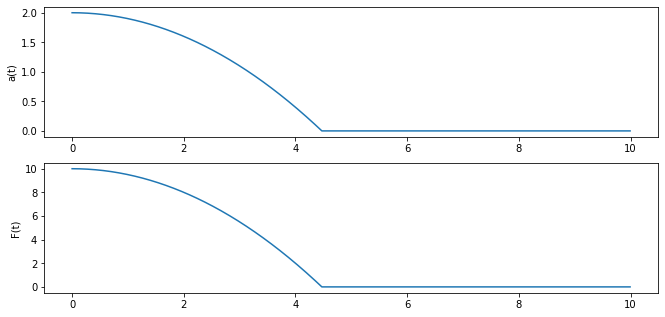

In [22]:
t_max = 10.0 # max t(s)
dt = 0.01 # dt idokoz
t_vec = np.arange(0.0, t_max, dt, dtype=np.float16)
F_t = np.vectorize(F)(t_vec)
a_t = np.vectorize(a)(t_vec)
fig1 = plt.figure(figsize=(11,11))
ax1 = fig1.add_subplot(411)
ax1.set_ylabel('a(t)')
ax1.plot(t_vec, a_t)
ax2 = fig1.add_subplot(412)
ax2.set_ylabel('F(t)')
ax2.plot(t_vec, F_t)
# ax3 = fig1.add_subplot(413)
# ax3.set_ylabel('v(t)')
# ax3.plot(t_vec, v_t)
# for i in range(len(F_t)):
#    print("t %.2f F_t %.2f a_t %.2f v_t %.2f"%(t_vec[i], F_t[i], a_t[i], v_t[i]))

In [23]:
# Hany masodpercig no a test sebessege?
t_veg = 0
i = 0
while a_t[i] != 0:
    i += 1
t_veg = t_vec[i]
print("A test sebessege %.2f s-ig no."%t_veg)

A test sebessege 4.47 s-ig no.


In [24]:
# Mekkora a test vegsebessege? (Osszetett simpson formulaval kozelitettem az integralast.
# a_t integraltja a delta v)
v_delta = osszSimpson(a, t_vec)
print("Test vegsebessege: %.2f m/s"%v_delta)

Test vegsebessege: 5.96 m/s


In [25]:
# Mennyire tavolodott el a kezdo helyzettol addig, amig elerte a vegsebesseget.
def v_nov(f, t_vec): # sebesseg tablazat amig el nem erte a vegsebesseget
    v_vec = np.empty((0))
    for i in range(len(t_vec)):
        if t_vec[i] <= t_veg:
            v_vec = np.append(v_vec, simpson(f, 0.0, t_vec[i]))
        else:
            break
    return v_vec

t_sebnov = np.arange(0.0, t_veg, dt)
v_t = v_nov(a, t_sebnov)
# fig2 = plt.figure() # ez csak edrekesseg kedveert, ki lehet rajzolni v_t-t 
# ax1 = fig2.add_subplot()
# ax1.plot(t_sebnov, v_t)

def x(v_vec): # 
    x_t = 0.0
    for i in range(len(v_vec)):
        x_t += (v_vec[i])*dt
    return x_t

x_t = x(v_t)
print("%.2f m-re tavolodott el."%x_t)

16.68 m-re tavolodott el.


In [26]:
# Feladat megoldasa formalis derivalassal
t, a, m, v, x = sp.symbols('t a m v x')
F_tf = sp.sympify("10 - 0.5 * t**2")
a_tf = F_tf / 5 # a_tf-et ugy kapjuk meg ha F=a*m bol leosztunk m-el es megkapjuk a-t
print("a(t)-t ugy kapjuk meg ha F(t)-t osztjuk a tomeggel: %s"%a_tf)

a(t)-t ugy kapjuk meg ha F(t)-t osztjuk a tomeggel: 2 - 0.1*t**2


In [27]:
# Hany masodpercig no a test sebessege?
# Amig a gyorsulas nem lesz nulla.
t_vegseb = sp.solveset(a_tf - 0, t)
for mo in t_vegseb: # itt kivalasztjuk azt a megoldast ami nagyobb mint 0
    if mo > 0:
        t_vegseb = mo
        print("A testnek %.2f s-ig no a sebessge."%t_vegseb)

A testnek 4.47 s-ig no a sebessge.


In [28]:
# Mekkora a test vegsebessege?
# Ezt ugy kapjuk meg hogy ha a(t)-t integraljuk 
# a t0-tol addig az idopontig aimg no a sebessege. (Elozo feladatreszben megadtuk)
v_t = sp.integrate(a_tf, (t)) + sp.integrate(a_tf, (t, 0))
print("A test vegsebessege %.2f m/s."%v_t.subs(t, t_vegseb))
sp.simplify(v_t)

A test vegsebessege 5.96 m/s.


In [19]:
# Mennyire távolodott el a kezdo helyzettol addig, amíg elérte a végsebességét?
# x(t)-t ugy kapjuk meg ha integraljuk v(t)-t, t0 tol vegsebesseg elereseig
a_megtett = sp.integrate(v_t, (t, 0, t_vegseb))
print("A test %.2f m-re tavolodott el."%a_megtett)

A test 16.67 m-re tavolodott el.
